<a href="https://colab.research.google.com/github/bharathbolla/EVA4/blob/S9/EVA_session9_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/My\ Drive/Colab\ Notebooks/EVA4/S9_Assignment/

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
/content/gdrive/My Drive/Colab Notebooks/EVA4/S9_Assignment


##IMPORTING


In [2]:
!nvidia-smi

Sun Mar 22 02:02:57 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.64.00    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P0    25W / 250W |      0MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [3]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
%matplotlib inline
import matplotlib.pyplot as plt
import torchvision
from tqdm import tqdm
import numpy as np
import torchvision.transforms as transforms
import albumentations
from albumentations.pytorch import ToTensor
import random
from GradCam.gradcam_visualize import GradCAMView
import loader9
import model9
import train9
import test9

Using downloaded and verified file: ./data/cifar-10-python.tar.gz
Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
Files already downloaded and verified
CUDA Available? True


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


truck  frog  bird plane


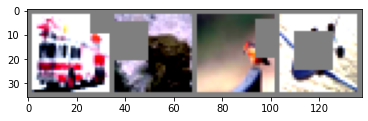

In [7]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

# get some random training images
dataiter = iter(loader9.train_loader_Alb)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))

# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [8]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = model9.ResNet18().to(device)
summary(model, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

In [9]:
model =  model9.ResNet18().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9, weight_decay=0) 

loss_func=nn.CrossEntropyLoss()
 
for epoch in range(25):
    print("Epoch:", epoch)
    train9.train(model, device, loader9.train_loader_Albumentation, optimizer, loss_func, epoch)
    # scheduler.step()
    test9.test(model, device, loader9.test_loader,loss_func,last_epoch=True)

  0%|          | 0/782 [00:00<?, ?it/s]

Epoch: 0


Epoch= 0 Loss=1.0866576433181763 Batch_id=781 Accuracy=49.39: 100%|██████████| 782/782 [00:30<00:00, 25.95it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0192, Accuracy: 5934/10000 (59.34%)

Epoch: 1


Epoch= 1 Loss=0.9399635791778564 Batch_id=781 Accuracy=68.62: 100%|██████████| 782/782 [00:30<00:00, 25.88it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0138, Accuracy: 7011/10000 (70.11%)

Epoch: 2


Epoch= 2 Loss=0.747513473033905 Batch_id=781 Accuracy=75.56: 100%|██████████| 782/782 [00:30<00:00, 26.02it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0107, Accuracy: 7729/10000 (77.29%)

Epoch: 3


Epoch= 3 Loss=0.9987692832946777 Batch_id=781 Accuracy=79.19: 100%|██████████| 782/782 [00:30<00:00, 26.01it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0106, Accuracy: 7762/10000 (77.62%)

Epoch: 4


Epoch= 4 Loss=0.7110612392425537 Batch_id=781 Accuracy=81.97: 100%|██████████| 782/782 [00:30<00:00, 26.04it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0097, Accuracy: 7972/10000 (79.72%)

Epoch: 5


Epoch= 5 Loss=0.39812028408050537 Batch_id=781 Accuracy=83.96: 100%|██████████| 782/782 [00:30<00:00, 25.85it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0081, Accuracy: 8280/10000 (82.80%)

Epoch: 6


Epoch= 6 Loss=0.7740734815597534 Batch_id=781 Accuracy=85.76: 100%|██████████| 782/782 [00:29<00:00, 26.14it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0080, Accuracy: 8364/10000 (83.64%)

Epoch: 7


Epoch= 7 Loss=0.5920940637588501 Batch_id=781 Accuracy=87.33: 100%|██████████| 782/782 [00:30<00:00, 26.02it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0086, Accuracy: 8239/10000 (82.39%)

Epoch: 8


Epoch= 8 Loss=0.32832497358322144 Batch_id=781 Accuracy=88.29: 100%|██████████| 782/782 [00:29<00:00, 26.32it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0071, Accuracy: 8518/10000 (85.18%)

Epoch: 9


Epoch= 9 Loss=0.6923912763595581 Batch_id=781 Accuracy=89.50: 100%|██████████| 782/782 [00:29<00:00, 26.23it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0083, Accuracy: 8360/10000 (83.60%)

Epoch: 10


Epoch= 10 Loss=0.21579651534557343 Batch_id=781 Accuracy=90.64: 100%|██████████| 782/782 [00:29<00:00, 26.09it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0083, Accuracy: 8434/10000 (84.34%)

Epoch: 11


Epoch= 11 Loss=0.05740341544151306 Batch_id=781 Accuracy=91.50: 100%|██████████| 782/782 [00:29<00:00, 26.08it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0073, Accuracy: 8594/10000 (85.94%)

Epoch: 12


Epoch= 12 Loss=0.028187990188598633 Batch_id=781 Accuracy=92.18: 100%|██████████| 782/782 [00:29<00:00, 26.10it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0072, Accuracy: 8638/10000 (86.38%)

Epoch: 13


Epoch= 13 Loss=0.30144572257995605 Batch_id=781 Accuracy=92.77: 100%|██████████| 782/782 [00:29<00:00, 26.12it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0074, Accuracy: 8659/10000 (86.59%)

Epoch: 14


Epoch= 14 Loss=0.1078999787569046 Batch_id=781 Accuracy=93.45: 100%|██████████| 782/782 [00:29<00:00, 26.10it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0089, Accuracy: 8485/10000 (84.85%)

Epoch: 15


Epoch= 15 Loss=0.3836749196052551 Batch_id=781 Accuracy=93.81: 100%|██████████| 782/782 [00:29<00:00, 26.08it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0077, Accuracy: 8641/10000 (86.41%)

Epoch: 16


Epoch= 16 Loss=0.7200032472610474 Batch_id=781 Accuracy=94.25: 100%|██████████| 782/782 [00:29<00:00, 26.14it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0077, Accuracy: 8706/10000 (87.06%)

Epoch: 17


Epoch= 17 Loss=0.14825080335140228 Batch_id=781 Accuracy=94.73: 100%|██████████| 782/782 [00:29<00:00, 26.09it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0077, Accuracy: 8659/10000 (86.59%)

Epoch: 18


Epoch= 18 Loss=0.15602675080299377 Batch_id=781 Accuracy=95.11: 100%|██████████| 782/782 [00:29<00:00, 26.18it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0077, Accuracy: 8683/10000 (86.83%)

Epoch: 19


Epoch= 19 Loss=0.017869025468826294 Batch_id=781 Accuracy=95.31: 100%|██████████| 782/782 [00:29<00:00, 26.08it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0081, Accuracy: 8621/10000 (86.21%)

Epoch: 20


Epoch= 20 Loss=0.06307196617126465 Batch_id=781 Accuracy=95.59: 100%|██████████| 782/782 [00:29<00:00, 26.27it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0077, Accuracy: 8737/10000 (87.37%)

Epoch: 21


Epoch= 21 Loss=0.17333915829658508 Batch_id=781 Accuracy=95.89: 100%|██████████| 782/782 [00:29<00:00, 26.31it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0081, Accuracy: 8690/10000 (86.90%)

Epoch: 22


Epoch= 22 Loss=0.027501195669174194 Batch_id=781 Accuracy=96.22: 100%|██████████| 782/782 [00:29<00:00, 26.36it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0079, Accuracy: 8724/10000 (87.24%)

Epoch: 23


Epoch= 23 Loss=0.11730393767356873 Batch_id=781 Accuracy=96.36: 100%|██████████| 782/782 [00:30<00:00, 25.97it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0078, Accuracy: 8803/10000 (88.03%)

Epoch: 24


Epoch= 24 Loss=0.018981724977493286 Batch_id=781 Accuracy=96.48: 100%|██████████| 782/782 [00:29<00:00, 26.32it/s]



Test set: Average loss: 0.0079, Accuracy: 8802/10000 (88.02%)



Text(0.5, 1.0, 'Test Accuracy')

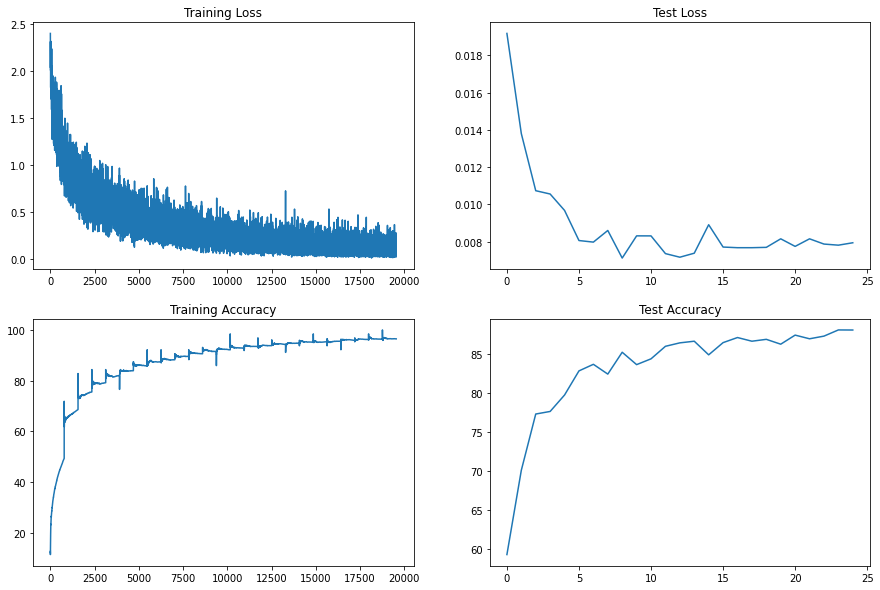

In [11]:
fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(train9.train_losses)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train9.train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test9.test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test9.test_acc)
axs[1, 1].set_title("Test Accuracy")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


GroundTruth:   frog  frog   car  deer


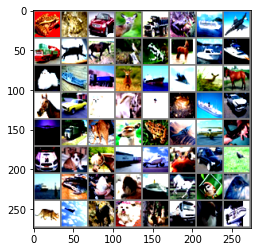

In [12]:
dataiter = iter(loader9.test_loader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [13]:
outputs = model(images.cuda())
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]] for j in range(4)))

Predicted:   frog  frog   car  deer


In [14]:
from tqdm import tqdm

class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
  pbar = tqdm(loader9.test_loader)
  for i, (data, target) in enumerate(pbar):
    data, target = data.to(device), target.to(device)
    outputs = model(data)
    _, predicted = torch.max(outputs, 1)
    c = (predicted == target).squeeze()
    for i in range(4):
        label = target[i]
        class_correct[label] += c[i].item()
        class_total[label] += 1
for i in range(10):
  print('Accuracy of %5s : %2d %%' % (classes[i], 100 * class_correct[i] / class_total[i]))

100%|██████████| 157/157 [00:03<00:00, 51.00it/s]

Accuracy of plane : 92 %
Accuracy of   car : 91 %
Accuracy of  bird : 89 %
Accuracy of   cat : 78 %
Accuracy of  deer : 82 %
Accuracy of   dog : 75 %
Accuracy of  frog : 91 %
Accuracy of horse : 93 %
Accuracy of  ship : 95 %
Accuracy of truck : 94 %


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2416: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


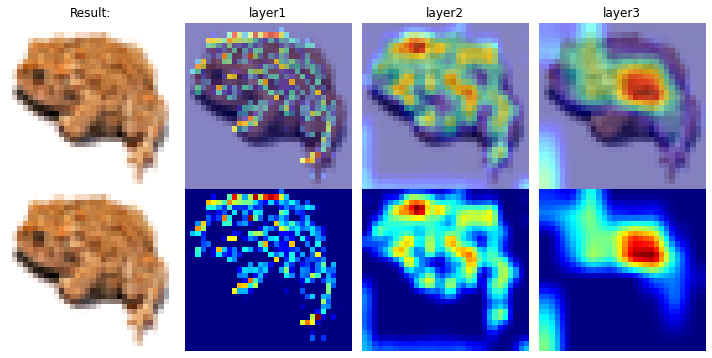

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<Figure size 432x288 with 0 Axes>

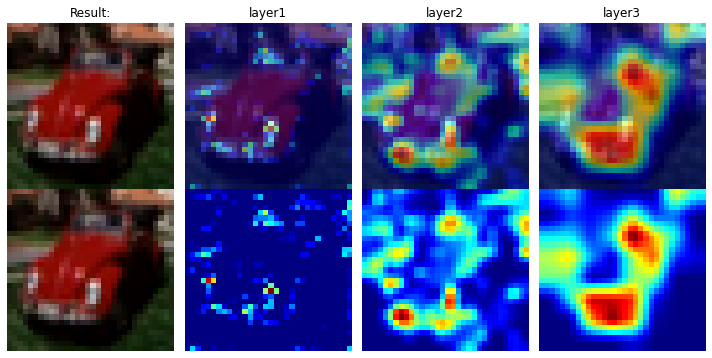

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<Figure size 432x288 with 0 Axes>

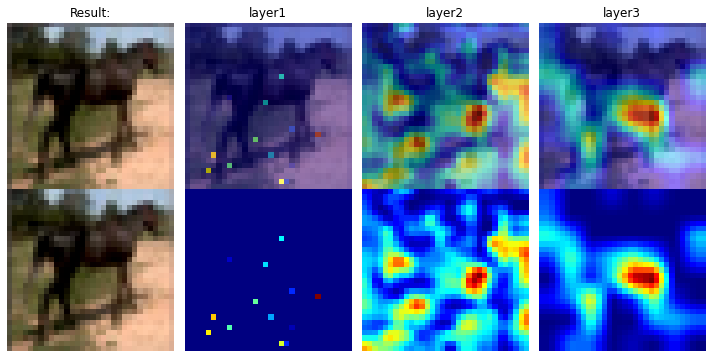

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<Figure size 432x288 with 0 Axes>

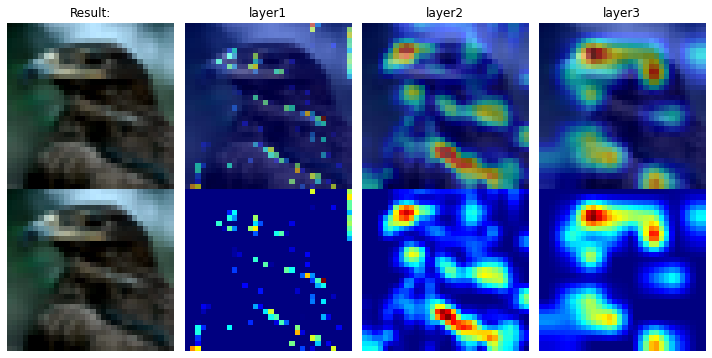

<Figure size 432x288 with 0 Axes>

In [16]:
layers = ['layer1', 'layer2', 'layer3']
grad_cam = GradCAMView(model, layers, device, loader9.mean, loader9.std)
images = [x['image'] for x in random.sample(test9.correct_pred, 4)]
grad_cam(images, "grad_cam")